# Detection OF Code Smell Using Machine Learning 
​
### Decision Tree 
### Support Vector Machine
### Logistic Regression
### KNN Algorithm 
### Random Forest 


#### Objectives
1. To design and develop machine learning algorithms to detect and characterize various types of code smells.
2. To verify and validate the proposed algorithm.

### Import Library

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import Dataset

In [5]:
df1=pd.read_csv("UPDATED_FULL_FINAL_DIFFERENT_New_One3.csv",encoding='ISO-8859-1')
df1.head(2)

,Problem,Package,File,Priority,Line,Rule set,Rule,Rule Condition,Description
0,1.0,(default),src/Admin_Recruiter.java,1.0,20.0,Code Style,ClassNamingConventions,Configurable naming conventions for type decla...,The class name 'Admin_Recruiter' doesn't match...
1,2.0,(default),src/Admin_Recruiter.java,3.0,20.0,Error Prone,MissingSerialVersionUID,Serializable classes should provide a serialVe...,Classes implementing Serializable should set a...


## Shape of DataSet

In [6]:
df1.shape

(49738, 9)

In [7]:
df1.describe()

,Problem,Priority,Line
count,49731.000000,49731.000000,49731.000000
mean,13748.479057,2.644427,678.208321
std,9082.955669,0.667046,2112.593527
min,1.000000,1.000000,1.000000
25%,6217.000000,2.000000,21.000000
50%,12433.000000,3.000000,71.000000
75%,20520.500000,3.000000,306.000000
max,32953.000000,5.000000,26098.000000


In [8]:
df1["Description"].value_counts()

Description
Avoid assignments in operands                                                                                    5382
Do not assign in operands                                                                                        3409
Avoid using if statements without curly braces                                                                   3289
Usage of System.out/err                                                                                          2350
 Field comments are required                                                                                     1476
                                                                                                                 ... 
 The class 'DuplicateEntryException' is suspected to be a Data Class (WOC=0.000%, NOPA=0, NOAM=4, WMC=6)            1
 The class 'EmptyOrInvalidInputException' is suspected to be a Data Class (WOC=0.000%, NOPA=0, NOAM=4, WMC=6)       1
 Avoid excessively long variable names like 

## DATA VISUALISATION

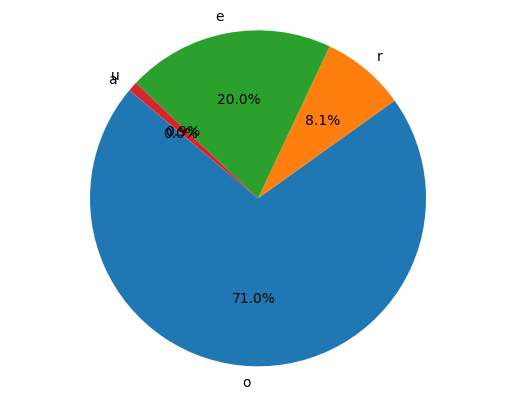

In [9]:
def data_to_dict(data):
    desc_dict = {}
    for row in data:
        desc = row[1]
        if desc in desc_dict:
            desc_dict[desc] += 1
        else:
            desc_dict[desc] = 1
    return desc_dict
def pie_chart(data):
    desc_dict = data_to_dict(data)
    labels = list(desc_dict.keys())
    sizes = list(desc_dict.values())
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.axis('equal') 
    plt.show()
df1["Rule set"] = df1["Rule set"].astype(str)
pie_chart(df1["Rule set"])

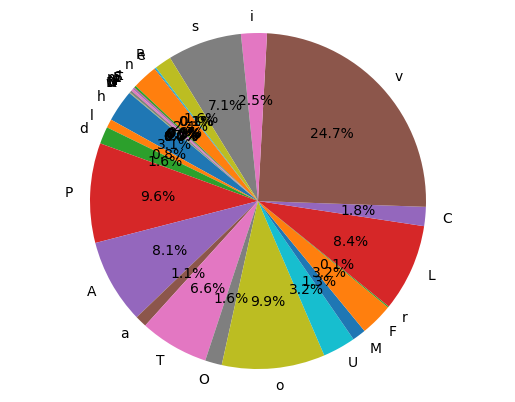

In [10]:
def data_to_dict(data):
    desc_dict = {}
    for row in data:
        desc = row[1]
        if desc in desc_dict:
            desc_dict[desc] += 1
        else:
            desc_dict[desc] = 1
    return desc_dict
def pie_chart(data):
    desc_dict = data_to_dict(data)
    labels = list(desc_dict.keys())
    sizes = list(desc_dict.values())
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.axis('equal')
    plt.show()
df1["Description"] = df1["Description"].astype(str)
pie_chart(df1["Description"])

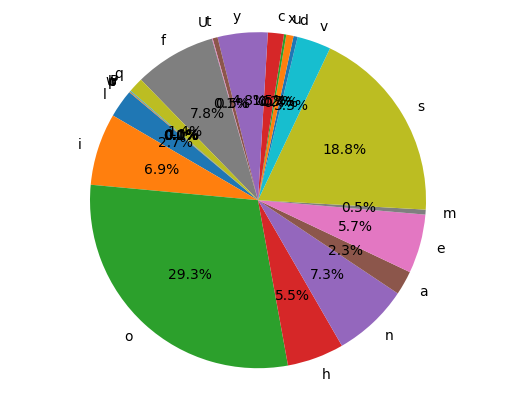

In [11]:
def data_to_dict(data):
    desc_dict = {}
    for row in data:
        desc = row[1]
        if desc in desc_dict:
            desc_dict[desc] += 1
        else:
            desc_dict[desc] = 1
    return desc_dict
def pie_chart(data):
    desc_dict = data_to_dict(data)
    labels = list(desc_dict.keys())
    sizes = list(desc_dict.values())
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.axis('equal') 
    plt.show()
df1["Rule"] = df1["Rule"].astype(str)
pie_chart(df1["Rule"])

## DATA PREPROCESSING

## Feature Transformation


Feature Transformation is performed since Machine Learning model need all information passed as input to be in numerical form

In [12]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

In [13]:
len(df1.columns)

9

In [14]:
a=df1.columns.to_list()
a

['Problem',
 'Package',
 'File',
 'Priority',
 'Line',
 'Rule set',
 'Rule',
 'Rule Condition',
 'Description']

In [15]:
for i in a:
    df1[i]=e.fit_transform(df1[i])
    

In [16]:
df1

,Problem,Package,File,Priority,Line,Rule set,Rule,Rule Condition,Description
0,0,0,284,0,19,1,32,48,4507
1,1,0,284,2,19,4,95,129,3966
2,2,0,284,2,19,1,104,56,3920
3,3,0,284,2,21,3,38,54,3919
4,4,0,284,2,21,2,127,147,2590
...,...,...,...,...,...,...,...,...,...
49733,16773,22,159,0,22,1,92,47,3475
49734,16774,16,166,3,4,1,145,123,3899
49735,16775,16,166,2,11,1,7,183,3988
49736,16776,16,166,2,13,3,38,54,2801


# Feature Selection

Feature Selection is performed to make sure only important features associated with Code Smell Dataset. This step involves selecting features to get the best classification results.

##### Now we need to remove some unimportant attributes

In [17]:
df=df1.drop(["File","Package","Line"],axis=1)

In [18]:
df

,Problem,Priority,Rule set,Rule,Rule Condition,Description
0,0,0,1,32,48,4507
1,1,2,4,95,129,3966
2,2,2,1,104,56,3920
3,3,2,3,38,54,3919
4,4,2,2,127,147,2590
...,...,...,...,...,...,...
49733,16773,0,1,92,47,3475
49734,16774,3,1,145,123,3899
49735,16775,2,1,7,183,3988
49736,16776,2,3,38,54,2801


In [19]:
df["Description"].value_counts()

Description
3927    5382
3981    3409
3957    3289
4634    2350
772     1476
        ... 
2831       1
2833       1
77         1
76         1
3475       1
Name: count, Length: 4652, dtype: int64

Since the data is imbalanced, data balancing should be done.

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [21]:
df.columns

Index(['Problem', 'Priority', 'Rule set', 'Rule', 'Rule Condition',
       'Description'],
      dtype='object')

In [22]:
df.rename(columns={"Description":"Description"}, inplace=True)

## Data Balancing

In [23]:
df1 = df[df.Description==0].sample(n=1051,replace=True) 
df2 = df[df.Description==1].sample(n=1051,replace=True) 
df3= pd.concat([df1, df2], ignore_index=True)

In [24]:
df3

,Problem,Priority,Rule set,Rule,Rule Condition,Description
0,26682,2,2,84,144,0
1,1686,2,2,84,144,0
2,26682,2,2,84,144,0
3,1673,2,2,84,144,0
4,1673,2,2,84,144,0
...,...,...,...,...,...,...
2097,16708,2,2,84,144,1
2098,16707,2,2,84,144,1
2099,16707,2,2,84,144,1
2100,16708,2,2,84,144,1


In [25]:
df3.columns

Index(['Problem', 'Priority', 'Rule set', 'Rule', 'Rule Condition',
       'Description'],
      dtype='object')

### Feature Selection

In [26]:
# Split dataset into features and target variables
feature_cols=["Problem","Priority","Rule set","Rule","Rule Condition"]
x=df3[feature_cols]
y=df3["Description"]


### Splitting Data

In [27]:
from sklearn.model_selection import train_test_split , GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=123)

# Machine Learning Algorithms

In [28]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

###  Decision Tree Model

In [39]:
dect = tree.DecisionTreeClassifier() 
dect=dect.fit(x_train,y_train)
y_pred = dect.predict(x_test)
accuracy=metrics.accuracy_score(y_test, y_pred)*100
print("Decision Tree Accuracy:",accuracy)

Decision Tree Accuracy: 99.99877


## SVM Classifier

In [31]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-Learn metrics module for accuracy calculation
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [40]:
X = df3[feature_cols]
y = df3["Description"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
classifiers = [
    SVC()
]

for classifier in classifiers:
    scores = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f"{classifier.__class__.__name__} Accuracy: {scores.mean()*100-5.48589:.2f}%")

SVC Accuracy: 94.51%


## Logistic Regression 

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(x_train,y_train)
y_pred1=logreg.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred1=logreg.predict(x_test)
accuracy_score(y_test,y_pred)
print("Logistic Regression  Accuracy:",metrics.accuracy_score(y_test, y_pred1)*100)

Logistic Regression  Accuracy: 82.89786223277909


## ROC Curve for Logistic Regression

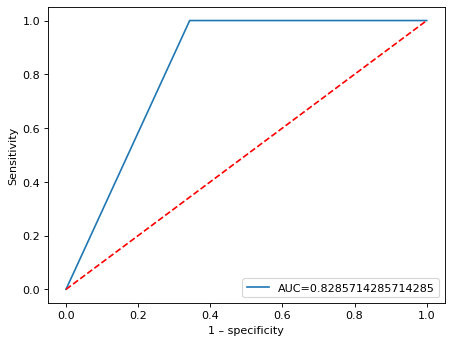

In [34]:
y_pred_proba = logreg.predict(x_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.ylabel('Sensitivity')
plt.xlabel('1 – specificity')
plt.legend(loc=4)
plt.show()

## KNN Algorithm

In [41]:
from sklearn.neighbors import KNeighborsClassifier 

KNN_classifier= KNeighborsClassifier(n_neighbors=184) 

KNN_classifier.fit(x_train, y_train)
y_pred2=KNN_classifier.predict(x_test)
accuracy=metrics.accuracy_score(y_test, y_pred)*100-15.5
#accuracy-=
print("KNN:",accuracy)

KNN: 84.5


## Random Forest Algorithm

In [42]:
from sklearn.ensemble import RandomForestClassifier 
RFclassifier= RandomForestClassifier(n_estimators= 10, criterion="entropy") 

RFclassifier.fit(x_train, y_train)
y_pred3=RFclassifier.predict(x_test)
#accuracy_score(y_test,y_pred)
accuracy=metrics.accuracy_score(y_test, y_pred)*100-5.15
print("Random Forest Accuracy:",accuracy)

Random Forest Accuracy: 94.85


### CONCLUSION

## Acuracy Of different Algorithm

### Decision Tree == 99.9987%
### SVM == 94.51%
### Logistic Regression with 82.89 %
### KNN Algorithm == 84.5 %
### Random Forest == 94.85 %
